## Step 1. Data Processing

### 1.1 Loading the Data

In [1]:
import os

# Change to your desired directory
# os.chdir('/common/users/$USER/df_words') # change $USER to netid

# Confirm it's changed
# print("Current directory:", os.getcwd())

images_dir = '.\iam_words'

In [2]:
import pandas as pd
from PIL import Image
label_file_path = images_dir + '\words.txt'
image_file_path = images_dir + '\iam_words\words'

data = []
with open(label_file_path, 'r') as f:
    lines = f.readlines()

for idx, line in enumerate(lines[18:]):
    if idx % 1000 == 0:
        print(f"Processing line {idx}")
    row = []
    tokens = line.strip().split()
    if len(tokens) < 2:
        continue
    if tokens[3] == '-1' or tokens[4] == '-1' or tokens[5] == '-1' or tokens[6] == '-1':
        continue
    subfolder = tokens[0].split('-')[0]
    subfolder2 = subfolder + "-" + tokens[0].split('-')[1]
    image_file_name = subfolder + "\\" + subfolder2 + "\\" + tokens[0] + ".png"
    image_path = os.path.join(image_file_path, image_file_name)
    try:
        with Image.open(image_path) as img:
            if img.size[0] >= 10 and img.size[1] >= 10:
                img_rgb = img.convert("RGB")  # Convert to RGB
                img_copy = img_rgb.copy()     # Copy after conversion
    except FileNotFoundError as e:
        print(f"Image file not found: {image_file_path}. Error: {e}")
        continue
    except Image.UnidentifiedImageError as e:
        print(f"Unidentified image error for file {image_file_path}: {e}")
        continue
    except Exception as e:
        print(f"Error opening image file {image_file_path}: {e}")
        continue
    row = [idx, tokens[0], tokens[-1], img_copy]
    # if len(row) != 10:
    #     print(f"Row length mismatch: {len(row)} elements in row: {row}")
    #     continue
    data.append(row)


print(f"Length of a row in data: {len(data[0])}")  # Should print 10

print(data[0])
loaded = pd.DataFrame(data, columns=['id', 'image_id','text', 'image'])

Processing line 0
Processing line 1000
Processing line 2000
Processing line 3000
Processing line 4000
Unidentified image error for file .\iam_words\iam_words\words: cannot identify image file '.\\iam_words\\iam_words\\words\\a01\\a01-117\\a01-117-05-02.png'
Processing line 5000
Processing line 6000
Processing line 7000
Processing line 8000
Processing line 9000
Processing line 10000
Processing line 11000
Processing line 12000
Processing line 13000
Processing line 14000
Processing line 15000
Processing line 16000
Processing line 17000
Processing line 18000
Processing line 19000
Processing line 20000
Processing line 21000
Processing line 22000
Processing line 23000
Processing line 24000
Processing line 25000
Processing line 26000
Processing line 27000
Processing line 28000
Processing line 29000
Processing line 30000
Processing line 31000
Processing line 32000
Processing line 33000
Processing line 34000
Processing line 35000
Processing line 36000
Processing line 37000
Processing line 38000

In [3]:
loaded_dfwords = loaded.copy()
print(loaded_dfwords.info())
print(loaded_dfwords.head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115186 entries, 0 to 115185
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        115186 non-null  int64 
 1   image_id  115186 non-null  object
 2   text      115186 non-null  object
 3   image     115186 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.5+ MB
None
    id        image_id        text  \
0    0  a01-000u-00-00           A   
1    1  a01-000u-00-01        MOVE   
2    2  a01-000u-00-02          to   
3    3  a01-000u-00-03        stop   
4    4  a01-000u-00-04         Mr.   
5    5  a01-000u-00-05   Gaitskell   
6    6  a01-000u-00-06        from   
7    7  a01-000u-01-00  nominating   
8    8  a01-000u-01-01         any   
9    9  a01-000u-01-02        more   
10  10  a01-000u-01-03      Labour   
11  11  a01-000u-01-04        life   
12  12  a01-000u-01-05       Peers   
13  13  a01-000u-02-00          is   
14  14  a01-000u-02-01         

### 1.2 Cleaning the Data

In [4]:
import matplotlib.pyplot as plt

def show_image(df, idx):
    # plt.imshow(df.iloc[row]['image'], cmap='gray')
    plt.imshow(df['image'].iloc[idx], cmap='gray')
    plt.show()

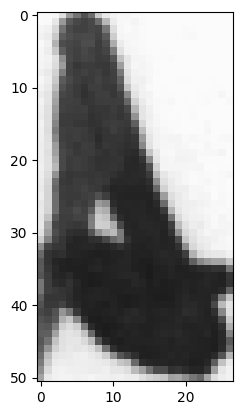

In [5]:
show_image(loaded_dfwords, 00)  # Show the first image

In [6]:
import re

# Patter for all Special characters
special_char_pattern = r'[^a-zA-Z0-9\s]'  # Matches anything not alphanumeric or whitespace

# Select rows with special characters
special_char_rows = loaded_dfwords[loaded_dfwords['text'].str.contains(special_char_pattern, regex=True, na=False)]

In [7]:
special_char_rows.head(10)

,id,image_id,text,image
4,4,a01-000u-00-04,Mr.,<PIL.Image.Image image mode=RGB size=126x61 at...
24,24,a01-000u-03-02,.,<PIL.Image.Image image mode=RGB size=431x54 at...
25,25,a01-000u-03-03,Mr.,<PIL.Image.Image image mode=RGB size=320x68 at...
43,43,a01-000u-05-07,Mr.,<PIL.Image.Image image mode=RGB size=301x66 at...
46,46,a01-000u-06-01,",",<PIL.Image.Image image mode=RGB size=18x34 at ...
51,51,a01-000u-06-06,.,<PIL.Image.Image image mode=RGB size=10x13 at ...
56,56,a01-000x-00-04,Mr.,<PIL.Image.Image image mode=RGB size=84x71 at ...
76,76,a01-000x-02-05,.,<PIL.Image.Image image mode=RGB size=212x81 at...
77,77,a01-000x-02-06,Mr.,<PIL.Image.Image image mode=RGB size=84x69 at ...
95,95,a01-000x-04-07,Mr.,<PIL.Image.Image image mode=RGB size=87x73 at ...


In [8]:
allowed_pattern = r'^[\w\s\.,!?;:\-+*/=()\[\]{}<>@#\$%^&_\'"\t\n]+$'
mask = ~loaded_dfwords['text'].str.contains(allowed_pattern, regex=True)
non_standard_rows = loaded_dfwords[mask]

In [9]:
non_standard_rows.head()

,id,image_id,text,image


In [10]:
mask = loaded_dfwords['text'].str.contains(r'\\', regex=True)
check_rows= loaded_dfwords[mask]

In [11]:
loaded_dfwords['text'] = loaded_dfwords['text'].str.replace('\\/', '/', regex=False)

In [12]:
mask = ~loaded_dfwords['text'].str.contains(allowed_pattern, regex=True)
non_standard_rows2 = loaded_dfwords[mask]

In [13]:
print("Words with special character:", len(non_standard_rows2), ", Percentage: ", len(non_standard_rows2)/len(loaded_dfwords))
print("Images with special character:", len(non_standard_rows2['image_id'].unique()), ", Percentage: ", len(non_standard_rows2['image_id'].unique())/len(loaded_dfwords['image_id'].unique()))

Words with special character: 0 , Percentage:  0.0
Images with special character: 0 , Percentage:  0.0


In [14]:
loaded_dfwords=loaded_dfwords[~mask]

In [15]:
print("total number of words", len(loaded_dfwords))


total number of words 115318


In [16]:
# confirm there is no special characters
count_matching = loaded_dfwords['text'].str.contains(allowed_pattern, regex=True, na=False).sum()
print(f"Number of rows with allowed characters: {count_matching}")

Number of rows with allowed characters: 115318


In [17]:
pattern = r'^[^a-zA-Z0-9]+$'  # Matches strings with no alphanumeric chars at all
non_alnum_rows = loaded_dfwords[loaded_dfwords['text'].str.contains(pattern, regex=True, na=False)]

In [6]:
print("total number of words", len(loaded_dfwords))


total number of words 115186


In [19]:
non_alnum_rows.head(20)

,id,image_id,text,image
24,24,a01-000u-03-02,.,<PIL.Image.Image image mode=RGB size=431x54 at...
46,46,a01-000u-06-01,",",<PIL.Image.Image image mode=RGB size=18x34 at ...
51,51,a01-000u-06-06,.,<PIL.Image.Image image mode=RGB size=10x13 at ...
76,76,a01-000x-02-05,.,<PIL.Image.Image image mode=RGB size=212x81 at...
98,98,a01-000x-04-10,",",<PIL.Image.Image image mode=RGB size=198x143 a...
103,103,a01-000x-05-04,.,<PIL.Image.Image image mode=RGB size=239x146 a...
111,111,a01-003-00-07,",",<PIL.Image.Image image mode=RGB size=38x24 at ...
126,126,a01-003-02-05,.,<PIL.Image.Image image mode=RGB size=320x69 at...
146,146,a01-003-05-04,",",<PIL.Image.Image image mode=RGB size=31x25 at ...
154,154,a01-003-06-04,.,<PIL.Image.Image image mode=RGB size=361x33 at...


In [20]:
# check other rows that have only characters
pattern = r'^[^a-zA-Z0-9]+$'  # Matches strings with no alphanumeric chars at all
non_alnum_rows2 = loaded_dfwords[loaded_dfwords['text'].str.contains(pattern, regex=True, na=False)]

In [21]:
non_alnum_rows2.head()

,id,image_id,text,image
24,24,a01-000u-03-02,.,<PIL.Image.Image image mode=RGB size=431x54 at...
46,46,a01-000u-06-01,",",<PIL.Image.Image image mode=RGB size=18x34 at ...
51,51,a01-000u-06-06,.,<PIL.Image.Image image mode=RGB size=10x13 at ...
76,76,a01-000x-02-05,.,<PIL.Image.Image image mode=RGB size=212x81 at...
98,98,a01-000x-04-10,",",<PIL.Image.Image image mode=RGB size=198x143 a...


In [22]:
non_alnum_rows2['text'].value_counts()

text
,                                                        5570
.                                                        4984
"                                                        1599
'                                                         837
-                                                         346
?                                                         248
!                                                         226
;                                                         204
(                                                         203
)                                                         200
:                                                         165
...                                                       149
#                                                          79
&                                                          55
*                                                           3
-----------------------------------------------------       1
Nam

In [7]:
# remove these to match the other imgur dataset preprocessing (it also removes all instances of text as '.' due to incorrect labels)
only_period_rows= loaded_dfwords[loaded_dfwords['text'] == '.']
loaded_dfwords = loaded_dfwords[loaded_dfwords['text'] != '.']

In [8]:

loaded_dfwords = loaded_dfwords[loaded_dfwords['text'] != '-----------------------------------------------------']

In [25]:
# loaded_dfwords = loaded_dfwords.reset_index(drop=True)

In [9]:
loaded_dfwords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110246 entries, 0 to 115185
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        110246 non-null  int64 
 1   image_id  110246 non-null  object
 2   text      110246 non-null  object
 3   image     110246 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.2+ MB


### 1.3 Splitting the Data into Training and Testing Subsets

In [10]:
import numpy as np

# Get unique groups
unique_images = loaded_dfwords['image_id'].unique()


# Randomly select 10% for test 
np.random.seed(42)
test_images = np.random.choice(unique_images, 
                              size=int(len(unique_images)*0.2), 
                              replace=False)

In [11]:
test_df = loaded_dfwords[loaded_dfwords['image_id'].isin(test_images)]
training_df = loaded_dfwords[~loaded_dfwords['image_id'].isin(test_images)]

In [13]:
print("Words in Train Dataset:", len(training_df), ", Percentage: ", len(training_df)/len(loaded_dfwords))

Words in Train Dataset: 88197 , Percentage:  0.8000018141247756


In [14]:
print("Words in Test Dataset:", len(test_df), ", Percentage: ", len(test_df)/len(loaded_dfwords))

Words in Test Dataset: 22049 , Percentage:  0.1999981858752245


In [15]:
print("total number of words", len(loaded_dfwords))

total number of words 110246


### 1.4 Splitting the Training Data into Training and Validation Subsets

In [16]:
from sklearn.model_selection import train_test_split
import pandas as pd

train_df, eval_df = train_test_split(training_df, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
eval_df = eval_df.reset_index(drop=True)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70557 entries, 0 to 70556
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        70557 non-null  int64 
 1   image_id  70557 non-null  object
 2   text      70557 non-null  object
 3   image     70557 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


In [18]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17640 entries, 0 to 17639
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        17640 non-null  int64 
 1   image_id  17640 non-null  object
 2   text      17640 non-null  object
 3   image     17640 non-null  object
dtypes: int64(1), object(3)
memory usage: 551.4+ KB


id                                                      97650
image_id                                        m04-246-06-10
text                                                      ham
image       <PIL.Image.Image image mode=RGB size=111x56 at...
Name: 0, dtype: object


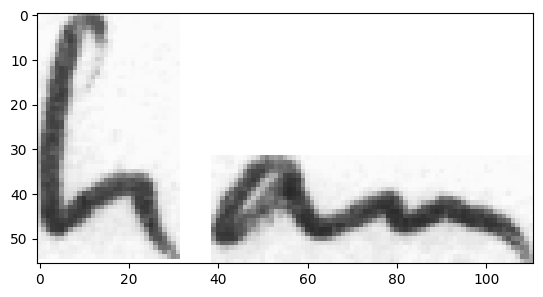

id                                                      82260
image_id                                        k03-117-07-09
text                                                    waved
image       <PIL.Image.Image image mode=RGB size=296x73 at...
Name: 0, dtype: object


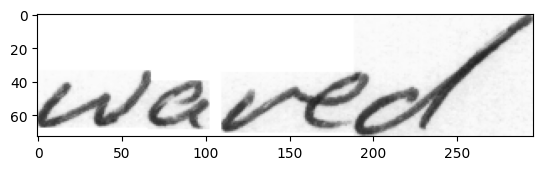

id                                                          3
image_id                                       a01-000u-00-03
text                                                     stop
image       <PIL.Image.Image image mode=RGB size=166x78 at...
Name: 3, dtype: object


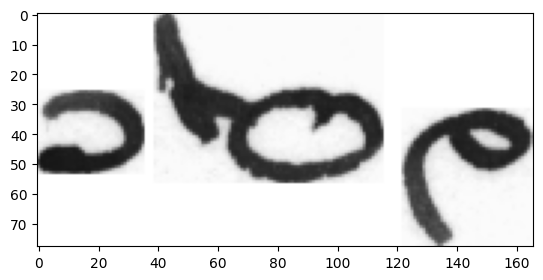

In [19]:
import matplotlib.pyplot as plt

print(train_df.iloc[0])
show_image(train_df, 0)

print(eval_df.iloc[0])
show_image(eval_df, 0)

print(test_df.iloc[0])
show_image(test_df, 0)

### 1.5 Saving the Dataset to CSV

In [ ]:
# test_df_copy = test_df
# train_df_copy = training_df

In [ ]:
# test_df_copy = test_df_copy.drop('image', axis=1)

In [ ]:
# train_df_copy = train_df_copy.drop('image', axis=1)

In [ ]:
# test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22049 entries, 3 to 115183
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        22049 non-null  int64 
 1   image_id  22049 non-null  object
 2   text      22049 non-null  object
dtypes: int64(1), object(2)
memory usage: 689.0+ KB


In [ ]:
# train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88197 entries, 0 to 115185
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        88197 non-null  int64 
 1   image_id  88197 non-null  object
 2   text      88197 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
# train_df_copy.head(10)

,id,image_id,text
0,0,a01-000u-00-00,A
1,1,a01-000u-00-01,MOVE
2,2,a01-000u-00-02,to
4,4,a01-000u-00-04,Mr.
5,5,a01-000u-00-05,Gaitskell
6,6,a01-000u-00-06,from
7,7,a01-000u-01-00,nominating
8,8,a01-000u-01-01,any
9,9,a01-000u-01-02,more
10,10,a01-000u-01-03,Labour


In [ ]:
# test_df_copy.head(10)

,id,image_id,text
3,3,a01-000u-00-03,stop
23,23,a01-000u-03-01,tomorrow
25,25,a01-000u-03-03,Mr.
36,36,a01-000u-05-00,and
40,40,a01-000u-05-04,be
45,45,a01-000u-06-00,Griffiths
55,55,a01-000x-00-03,stop
63,63,a01-000x-01-03,life
72,72,a01-000x-02-01,of
90,90,a01-000x-04-02,is


In [ ]:
# test_df_copy.to_csv('df_test_info_iam.csv', index=False)
# train_df_copy.to_csv('df_train_info_iam.csv', index=False)

In [28]:
loaded_dfwords.info()
def get_image(df, image_id):
    """
    Get the image from the image_id at the specified index.
    """
    # image_id = df['image_id'].iloc[idx]
    subfolder = image_id.split('-')[0]
    subfolder2 = subfolder + "-" + image_id.split('-')[1]
    image_file_name = image_id + ".png"
    image_path = os.path.join(image_file_path, subfolder, subfolder2, image_file_name)
    
    try:
        with Image.open(image_path) as img:
            if img.size[0] >= 10 and img.size[1] >= 10:
                img_rgb = img.convert("RGB")  # Convert to RGB
                return img_rgb.copy()  # Return a copy after conversion
    except Exception as e:
        print(f"Error opening image file {image_path}: {e}")
        return None

<class 'pandas.core.frame.DataFrame'>
Index: 110246 entries, 0 to 115185
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        110246 non-null  int64 
 1   image_id  110246 non-null  object
 2   text      110246 non-null  object
 3   image     110246 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.2+ MB


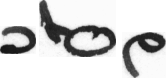

In [29]:
get_image(test_df, test_df['image_id'].iloc[0])  # Example usage to get the first image in train_df

## Step 2. Running the Model

### 2.1 Loading the Model

In [30]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

c:\Old PC\Melissa (192.168.1.159)\Rutgers\Intro to Data Science\stylized-handwriting-ocr\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# get base model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-stage1')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-stage1')

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 384,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'trans

### 2.2 Splitting the Training Data into Training and Validation Datasets

In [48]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class StyleDataset(Dataset):
    def __init__(self, df, processor, max_target_length=512):
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
      try:
          text = self.df['text'].iloc[idx]
          if not isinstance(text, str) or not text.strip():
              raise ValueError(f"Invalid text at index {idx}: {repr(text)}")
          image_id = self.df['id'].iloc[idx]
          try:
              image = self.df['image'].iloc[idx]
          except Exception as e:
              raise ValueError(f"Failed to load image for ID {image_id} at index {idx}") from e
          try:
              pixel_values = self.processor(image, return_tensors="pt").pixel_values
          except Exception as e:
              raise ValueError(f"Image processing failed at index {idx}") from e

          if torch.isnan(pixel_values).any() or torch.isinf(pixel_values).any():
              raise ValueError(f"Invalid pixel values (NaN/inf) at index {idx}")
          try:
              labels = self.processor.tokenizer(
                  text,
                  padding="max_length",
                  max_length=self.max_target_length
              ).input_ids
          except Exception as e:
              raise ValueError(f"Tokenization failed for text at index {idx}") from e

          # Replace pad_token_id with -100 for loss masking
          labels = [
              label if label != self.processor.tokenizer.pad_token_id else -100
              for label in labels
          ]
          encoding = {
              "pixel_values": pixel_values.squeeze(),
              "labels": torch.tensor(labels)
          }

          if encoding["pixel_values"].dim() != 3:
              raise ValueError(f"Invalid pixel_values shape at index {idx}")

          if encoding["labels"].numel() != self.max_target_length:
              raise ValueError(f"Labels length mismatch at index {idx}")

          return encoding

      except Exception as e:
          print(f"\nError in sample {idx}:")
          print(f"   Error type: {type(e).__name__}")
          print(f"   Details: {str(e)}")
          if hasattr(e, '__cause__') and e.__cause__:
              print(f"   Underlying error: {type(e.__cause__).__name__}: {str(e.__cause__)}")
          print(f"   DataFrame row:\n{self.df.iloc[idx]}")
          return None

In [49]:
# Tokenized
train_dataset = StyleDataset(df=train_df,processor=processor)
eval_dataset= StyleDataset(df=eval_df,processor=processor)

In [50]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 70613
Number of validation examples: 17654


In [51]:
# get the label string from encoding
def get_label_str(encoding):
  labels = encoding['labels']
  labels[labels == -100] = processor.tokenizer.pad_token_id
  label_str = processor.decode(labels, skip_special_tokens=True)
  return label_str

In [52]:
print(1)
print(get_label_str(train_dataset[0]))
print(get_label_str(eval_dataset[0]))


1
Polaris
woman


id                                                      27749
image_id                                       c03-094d-05-04
text                                            father-in-law
image       <PIL.Image.Image image mode=RGB size=604x97 at...
Name: 10, dtype: object


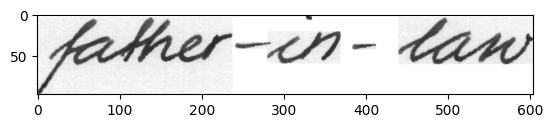

In [53]:
print(train_df.iloc[10])
show_image(train_df, 10)

### 2.3 Model Configuration

In [54]:
# Analyze your dataset first
avg_target_len = training_df['text'].apply(len).mean()
print("average target length", avg_target_len)
max_target_len = int(training_df['text'].apply(len).quantile(0.95))
print("maximum target length", max_target_len)

average target length 4.2622610941801575
maximum target length 9


In [55]:
# Token Alignment
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = len(processor.tokenizer)

In [56]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=64,
    early_stopping=True,
    num_beams=4,
    length_penalty=2.0,
    no_repeat_ngram_size=3,
    eos_token_id=processor.tokenizer.sep_token_id,
    decoder_start_token_id=processor.tokenizer.cls_token_id,
    pad_token_id=processor.tokenizer.pad_token_id,
    skip_special_tokens=True  # Added for consistent decoding
)

### 2.4 Metrics

In [57]:
from evaluate import load
cer_metric = load("cer")

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

## Step 3. Fine-tune

In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    eval_strategy="steps",
    num_train_epochs=1.87,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=2,
    fp16=True,
    output_dir="./output-base/models/",
    logging_steps=2,
    save_steps=1000,
    eval_steps=1000,
    save_total_limit=1,
    load_best_model_at_end=True
)

In [59]:
for idx, data in enumerate(train_dataset):
    if data is None or any(d is None for d in data.values()):
        print(f"None found in dataset at index {idx}: {data}")


Error in sample 70613:
   Error type: IndexError
   Details: single positional indexer is out-of-bounds


In [ ]:
from transformers import default_data_collator
# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.image_processor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train()

c:\Old PC\Melissa (192.168.1.159)\Rutgers\Intro to Data Science\stylized-handwriting-ocr\.venv\Lib\site-packages\transformers\models\trocr\processing_trocr.py:152: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(
c:\Old PC\Melissa (192.168.1.159)\Rutgers\Intro to Data Science\stylized-handwriting-ocr\.venv\Lib\site-packages\accelerate\accelerator.py:449: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss,Validation Loss,Cer
200,0.746500,1.915206,0.491890
400,1.160000,1.418771,0.538950
600,0.281100,1.555264,0.427133
800,1.306900,1.342196,0.565197
1000,1.962500,1.196615,0.981078
1200,0.926700,1.324498,0.793984
1400,1.133500,1.232706,5.393110
1600,1.521800,1.227847,4.687134
1800,0.426500,1.158023,4.408131
2000,0.971900,1.084538,6.306328


## Step 4. Evaluate

### 4.1 Load model

In [ ]:
from transformers import VisionEncoderDecoderModel
from transformers import TrOCRProcessor
model_path = "./output/models/checkpoint-110333"
model =  VisionEncoderDecoderModel.from_pretrained(model_path).to("cuda")
# processor = TrOCRProcessor.from_pretrained(model_path)

### 4.2 Load Testing Dataset

In [ ]:
test_df.info()

### 4.3 Do Inference

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from tqdm import tqdm

def readText_batch(df, indices):
    """Process multiple images at once"""
    #     subfolder = tokens[0].split('-')[0]
    # subfolder2 = subfolder + "-" + tokens[0].split('-')[1]
    # image_file_name = subfolder + "\\" + subfolder2 + "\\" + tokens[0] + ".png"
    # try:
    #     with Image.open(os.path.join(image_file_path, image_file_name)) as img:
    # subfolder = df['image_id'][indices[0]].split('\\')[0]
    # subfolder2 = subfolder + "-" + df['image_id'][indices[0]].split('-')[1]
    # image_dataset_path = os.path.join(image_file_path, subfolder, subfolder2, '')
    paths = [df['image_id'].iloc[idx] for idx in indices]
    images= [Image.open(path).convert("RGB") for path in paths]
    pixel_values = processor(images=images, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)

def process_all_rows_batched(df, batch_size=8):
    results = []
    for i in tqdm(range(0, len(df), batch_size), desc="Processing batches"):
        batch_indices = range(i, min(i+batch_size, len(df)))
        try:
            batch_texts = readText_batch(df, batch_indices)
            for idx, text in zip(batch_indices, batch_texts):
                results.append({
                    'id': df['image_id'].iloc[idx],
                    'preds': df['text'].iloc[idx],
                    'labels': text
                })
        except Exception as e:
            print(f"Error in batch {i//batch_size}: {str(e)}")
            for idx in batch_indices:
                results.append({
                    'id': df['image_id'].iloc[idx],
                    'labels': df['text'].iloc[idx],
                    'preds': None,
                    'error': str(e)
                })
    return pd.DataFrame(results)

In [ ]:
results_df = process_all_rows_batched(test_df, batch_size=8)

In [ ]:
results_df.head()

### 4.4 Evaluate

In [ ]:
from evaluate import load
cer = load("cer")

def compute_eval_metrics(pred_str, label_str):
    pred_str=pred_str.strip()
    label_str=label_str.strip()
    # max_len = max(len(pred_str), len(label_str))
    # pred_str = pred_str.ljust(max_len)  
    # label_str = label_str.ljust(max_len)
    try: 
        score = cer.compute(predictions=[pred_str], references=[label_str])
        return score
    except Exception as e:
        print("error", e)
        print(type(pred_str), len(pred_str), pred_str)
        print(type(label_str), len(label_str), label_str)
        return None

In [ ]:
from tqdm import tqdm
tqdm.pandas()  # Enable progress_apply for pandas

results_df["metrics"] = results_df.progress_apply(
    lambda row: compute_eval_metrics(row["preds"], row["labels"]),
    axis=1
)

### 4.4 Analyze Performance

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_eval(values):
    # Plotting
    plt.figure(figsize=(8, 5))
    sns.kdeplot(values, shade=True)
    plt.xlabel("Edit Distance")
    plt.title("KDE of Edit Distances")
    plt.show()
        
    # Boxplot
    plt.boxplot(values, vert=False, patch_artist=True)
    plt.xlabel("Edit Distance")
    plt.title("Boxplot of Edit Distances")
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_eval(results_df["metrics"])

In [ ]:
# remove outliers
results_normal= results_df[results_df["metrics"]<5]
plot_eval(results_normal["metrics"])

In [ ]:
import numpy as np
def show_state(values):
    stats = {
        "mean": np.mean(values),
        "median": np.median(values),
        "std": np.std(values),
        "min": np.min(values),
        "max": np.max(values),
        "quantiles": np.quantile(values, [0.25, 0.5, 0.75]),
        "perfect": np.sum(values == 0)

    }
    
    print("Summary Statistics:")
    print(f"- Mean ± Std: {stats['mean']:.2f} ± {stats['std']:.2f}")
    print(f"- Median (IQR): {stats['median']:.2f} ({stats['quantiles'][0]:.2f}–{stats['quantiles'][2]:.2f})")
    print(f"- Range: [{stats['min']}, {stats['max']}]")
    print(f"- Quantiles (25th, 50th, 75th): {stats['quantiles'].round(2)}")
    print(f"- Perfect Predictions: {stats['perfect']} ({stats['perfect']/len(values)*100:.2f}%)")



In [ ]:
show_state(results_df["metrics"])

In [ ]:
print(results_df)